#Recursive Least Square Method

LS or WLS uses entire dataset to find the best estimate, whereas, we do not use the entire set of the data but use earlier calculated estimate and the additional data. 

## RLS Algorithm

**Initialize the parameter and covariance estimates**:

----
Initial states, $\hat{\mathbf{x}}_0 = E\left[\mathbf{x}\right]$  

Initial state covariance matrix, $\mathbf{P}_0 = E\left[(\mathbf{x} - \hat{\mathbf{x}}_0)(\mathbf{x} - \hat{\mathbf{x}}_0)^T\right]$.  

**Assume measurement model**:

----
$$\mathbf{y}_k = \mathbf{H}_k\mathbf{x}+\mathbf{v}_k$$

**For every measurement k**:

----
  * Calculate the gain term: $$\mathbf{K}_k = \mathbf{P}_{k-1}\mathbf{H}_k^T\left(\mathbf{H}_k\mathbf{P}_{k-1}\mathbf{H}_k^T + \mathbf{R}_k\right)^{-1}$$
  * Update the parameter estimate: $$\hat{\mathbf{x}}_k = \hat{\mathbf{x}}_{k-1} + \mathbf{K}_k\left(\mathbf{y}_k - \mathbf{H}_k\hat{\mathbf{x}}_{k-1}\right)$$
  * Update the covariance estimate: $$\mathbf{P}_k = \left(\mathbf{I} - \mathbf{K}_k\mathbf{H}_k\right)\mathbf{P}_{k-1}$$
  
In this case, the initial parameter vector $\hat{\mathbf{x}}_0$ should contain $\hat{R}$ and $\hat{b}$. 

## Example - RLS
----
Following data are collected at equal time interval

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |

Fit a measurement linear model $V = IR' + b$ using recursive LS and compare with batch solution. The voltage measurements are corrupted by additive, independent and identitically distributed zero-mean Gaussian noise with a standard deviation of $0.15~V$ (i.e., a variance of $0.0225 ~ V^2$). Assume $\hat{R}$ and $\hat{b}$, follows a Gaussian or normal distribution with a mean of $4~\Omega$ and a standard deviation of $3~ \Omega$ for $\mathbf{R}$ and  a mean of $0~V$ and a variance of $0.2~V^{2}$ for $\mathbf{b}$.

###Solution
For the given noise in the parameters $\mathbf{R, b}$; the sensor noise can be representated by the following:  

$$\hat{R} \sim \mathcal{N}(4, 9.0),~~\hat{b} \sim \mathcal{N}(0, 0.2)$$


## Python Code
----
As before, the first step is to import the neccesary Python modules and load the current values and voltage measurements into NumPy arrays:

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [ ]:
I = np.array([[0.2, 0.3, 0.4, 0.5, 0.6]]).T
V = np.array([[1.23, 1.38, 2.06, 2.47, 3.17]]).T
print("Current \n",I,"\nVoltage \n", V)

In [ ]:
plt.scatter(I, V)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

## Estimating the Slope and Offset Parameters
----
### Batch Estimator
Before implementing the recursive least squares estimator, let's examine the parameter estimates given by the batch least squares method used in the previous assignment. This time, you will be fitting a model which contains an offset $y = Rx + b$. This result can be used later for comparison.

The slope and offset parameters of the best-fit line (i.e., the resistance and offset) are [R, b]:
4.970000000000001
0.07400000000000051


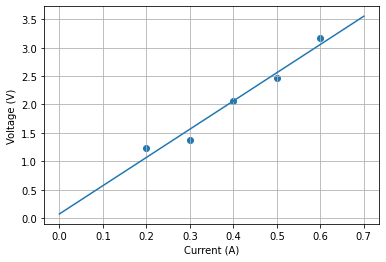

In [ ]:
## Batch Solution
# X(LS)=Inv(H_Transpose.H)(H_Transpose)(y)

H = np.ones((5, 2))
H[:, 0] = I.T
#print(H)
x_ls = inv(H.T.dot(H)).dot(H.T).dot(V)
print('The slope and offset parameters of the best-fit line (i.e., the resistance and offset) are [R, b]:')
print(x_ls[0,0])
print(x_ls[1,0])

# Plot line.
I_line = np.arange(0, 0.8, 0.1).reshape(8, 1) #Range taken from the given data (0.2 to 0.8 in this case)
V_line = x_ls[0,0]*I_line + x_ls[1,0] #V=R*I+b size of I

plt.scatter(I, V)
plt.plot(I_line, V_line)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

As expected, the offset parameter $\hat{b}$ is near zero, while $\hat{R}$ closely approximates the true resistance value of $R = 5~\Omega$.

In [ ]:
## Recursive Solution

# Assume initial values of the state [2x1] R and b.
x_k=np.array([[4.0], [0.0]])
#print(x_k)

#Assume initial Process Covariance matrix [2x2]. Off-diangonal be zeros.
P_k=np.array([[9.0, 0], [0, 0.2]])

# Our voltage measurement variance (denoted by R, don't confuse with resistance).
R_k = np.array([[0.0225]])
#print(x_k, P_k, R_k)

# Initialize the matrices to store estimates after every step.
num_meas = I.shape[0] # Try I.shape
#print ("Count ", num_meas) 

x = np.zeros((num_meas + 1, 2)) # +1 to store initial matrix
P = np.zeros((num_meas + 1, 2, 2)) # +1 to store initial matrix
#print("Shape of x", x.shape, "\n X matrix \n",x)
#print("Shape of P", P.shape, "\n P matrix \n",P)

# Assign initial x_k (k=0) to first row of x matrix. Let us check the shape
#print("Shape of x ", x.shape, ", x_k matrix ",x_k.shape, " and Transpose of x_k ", x_k.T.shape)

x[0] = x_k.T
P[0] = P_k
print("X ",x)



In [ ]:
# Iterate over all the available measurements.
for k in range(num_meas):
    # Construct H_k (Jacobian).
    H_k = np.array([H[k]])
    #print("Hk",H_k)

    # Construct K_k (gain matrix). 
    K_k=P_k.dot(H_k.T).dot(inv(H_k.dot(P_k.dot(H_k.T))+R_k))
    #print(K_k)
    
    # Update our estimate.
    x_k = x_k+K_k.dot(V[k]-H_k.dot(x_k))
 
    # Update uncertainty (covariance) of the Process/Model 
    P_k = K_k.dot(H_k)
    #print(P_k)
    
    # Store the intermediate result of Resistance and Intercept.
    P[k + 1] = P_k
    x[k + 1] = x_k.T
    #print(x_k)
    
print('The slope and offset parameters of the best-fit line (i.e., the resistance and offset) are [R, b]:')
print(x_k[0, 0])
print(x_k[1, 0])
#print(P)

In [ ]:
plt.scatter(I, V, label='Data')
plt.plot(I_line, V_line, label='Batch Solution')
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)

I_line = np.arange(0, 0.8, 0.1).reshape(8, 1)

for k in range(num_meas):
    V_line = x[k, 0]*I_line + x[k, 1]
    plt.plot(I_line, V_line, label='Measurement {}'.format(k))
plt.legend()
plt.show()